# Library construction

version 0 

these codes will be organized in modules for further usage

In [1]:
import numpy as np

Preprocessing Texts

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/zein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-zA-Z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text, lower=True, remove_stops=True):
    """
        text: a string
        
        return: modified initial string
    """
    if lower: text = text.lower()
    text = re.sub(REPLACE_BY_SPACE_RE,' ',text)
    text = re.sub(BAD_SYMBOLS_RE,'',text)
    if remove_stops: text = ' '.join(w for w in text.split() if w not in STOPWORDS)
    return text

In [4]:
from lib.textprocessingmd import text_prepare
text_prepare('Hello, I\'m Jon Snow', lower=False)

[nltk_data] Downloading package stopwords to /home/zein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Hello Im Jon Snow'

### Evaluation

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
def print_evaluation_scores(y_val, predicted):
    
    print("Accuracy:",accuracy_score(predicted,y_val))
    print("F1 macro:",f1_score(y_val, predicted,average="macro"))
    print("F1 micro:",f1_score(y_val, predicted,average="micro"))
    print("F1 weighted:",f1_score(y_val, predicted,average="weighted"))
    print("Precision macro:",average_precision_score(y_val, predicted,average="macro"))
    print("Precision micro:",average_precision_score(y_val, predicted,average="micro"))
    print("Precision weighted:",average_precision_score(y_val, predicted,average="weighted"))

In [6]:
#from lib.evaluationmd import print_evaluation_scores
y_val=np.array([[1,1,1],[1,0,1],[1,1,1],[1,1,1],[1,0,1],[0,0,0]])
y_val_predicted=np.array([[1,1,1],[1,0,1],[1,0,1],[1,1,1],[1,0,1],[1,1,1]])
print_evaluation_scores(y_val,y_val_predicted)

Accuracy: 0.6666666666666666
F1 macro: 0.8282828282828283
F1 micro: 0.8571428571428571
F1 weighted: 0.8531468531468531
Precision macro: 0.7592592592592594
Precision micro: 0.794017094017094
Precision weighted: 0.7820512820512822


### metrics.py

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def roc_auc(y_test, y_score, n_classes):  
    """Plots ROC curve for micro and macro averaging."""
    
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Compute macro-average ROC curve and ROC area     
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes 
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], 
             label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"], 
             label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(0,3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, 
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of ROC to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [8]:
#from metrics import roc_auc
%matplotlib inline

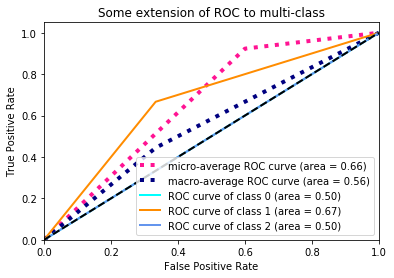

In [9]:
#from lib.evaluationmd import roc_auc
n_classes = 3
roc_auc(y_val, y_val_predicted, n_classes)

## Machine Learning methods for text

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [11]:
def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    clf = OneVsRestClassifier(RidgeClassifier(normalize=True))
    clf.fit(X_train, y_train)

    return clf